In [14]:
library(tidyverse)
library(ggplot2)
library(stringr)

library(rvest)
library(purrr)
library(polite)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::complete() masks RCurl::complete()
x dplyr::filter()   masks stats::filter()
x dplyr::lag()      masks stats::lag()

Warning message:
"package 'rvest' was built under R version 4.1.1"

Attaching package: 'rvest'


The following object is masked from 'package:readr':

    guess_encoding




In [15]:
covid_case <- read.csv("https://raw.githubusercontent.com/andyholmes1210/DATA201-Project/main/WHO-COVID-19-global-data.csv")
covid_case

ï..Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
2020-01-09,AF,Afghanistan,EMRO,0,0,0,0
2020-01-10,AF,Afghanistan,EMRO,0,0,0,0
2020-01-11,AF,Afghanistan,EMRO,0,0,0,0


In [24]:
covid_case_new_zealand <- covid_case %>%
    filter(Country == "New Zealand")

covid_case_new_zealand <- select(covid_case_new_zealand, -Country_code, -WHO_region, -New_deaths, -Cumulative_deaths)

covid_case_new_zealand

ï..Date_reported,Country,New_cases,Cumulative_cases
<chr>,<chr>,<int>,<int>
2020-01-03,New Zealand,0,0
2020-01-04,New Zealand,0,0
2020-01-05,New Zealand,0,0
2020-01-06,New Zealand,0,0
2020-01-07,New Zealand,0,0
2020-01-08,New Zealand,0,0
2020-01-09,New Zealand,0,0
2020-01-10,New Zealand,0,0
2020-01-11,New Zealand,0,0


In [25]:
border_crossing <- read.csv("https://raw.githubusercontent.com/andyholmes1210/DATA201-Project/main/covid_19_data_portal_Border%20crossings.csv")
border_crossing

ï..class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-01,13322,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-02,15351,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-03,15892,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-04,14771,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-05,14791,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-06,15360,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-07,14629,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-08,15423,Number,12-10-21
Economic,Travel,Daily border crossings (by port) - arrivals,Auckland,Auckland,2016-01-09,15521,Number,12-10-21


In [29]:
border_region <- select(border_crossing, -category, -indicator_name, -ï..class, -units, -date_last_updated, -sub_series_name)

border_region

series_name,parameter,value
<chr>,<chr>,<int>
Auckland,2016-01-01,13322
Auckland,2016-01-02,15351
Auckland,2016-01-03,15892
Auckland,2016-01-04,14771
Auckland,2016-01-05,14791
Auckland,2016-01-06,15360
Auckland,2016-01-07,14629
Auckland,2016-01-08,15423
Auckland,2016-01-09,15521


In [40]:
border_auckland <- border_region %>%
    filter(series_name == "Auckland")
#border_auckland

border_auckland <- select(border_auckland, -series_name)
border_auckland[is.na(border_auckland)] <- 0

border_auckland

parameter,value
<chr>,<int>
2016-01-01,13322
2016-01-02,15351
2016-01-03,15892
2016-01-04,14771
2016-01-05,14791
2016-01-06,15360
2016-01-07,14629
2016-01-08,15423
2016-01-09,15521


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



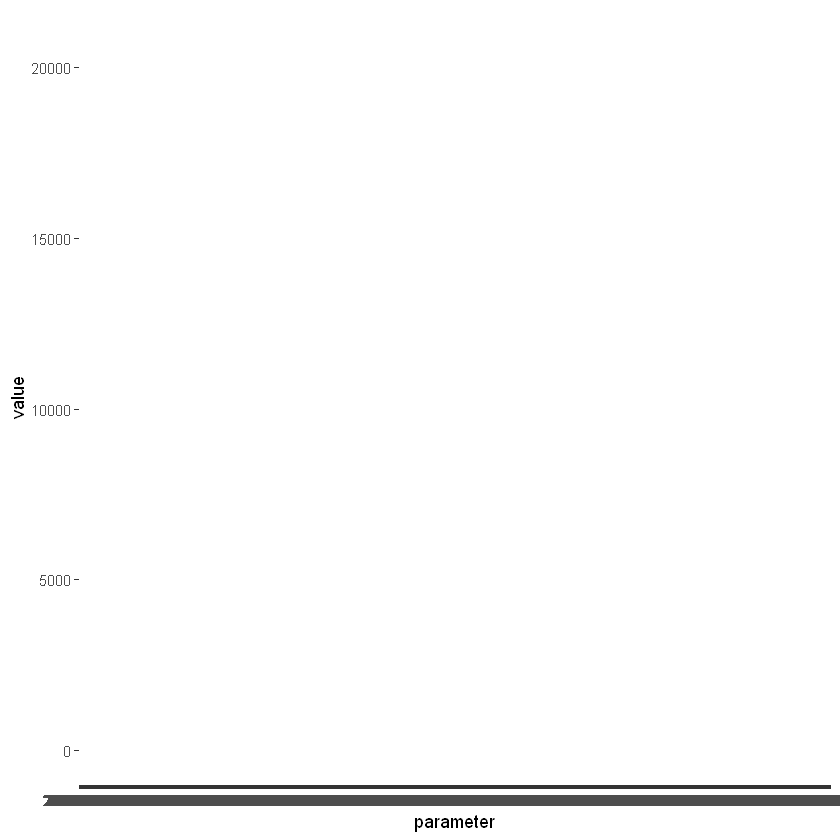

In [43]:
ggplot(border_auckland) + 
        geom_line(
            mapping = aes(x = parameter, y = value)
)


In [32]:
border_christchurch <- border_region %>%
    filter(series_name == "Christchurch")
#border_christchurch

border_christchurch <- select(border_christchurch, -series_name)

border_christchurch

parameter,value
<chr>,<int>
2016-01-01,2583
2016-01-02,3136
2016-01-03,3377
2016-01-04,3330
2016-01-05,3258
2016-01-06,2896
2016-01-07,3140
2016-01-08,2963
2016-01-09,3157


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"NAs introduced by coercion"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in plot.window(...): need finite 'xlim' values


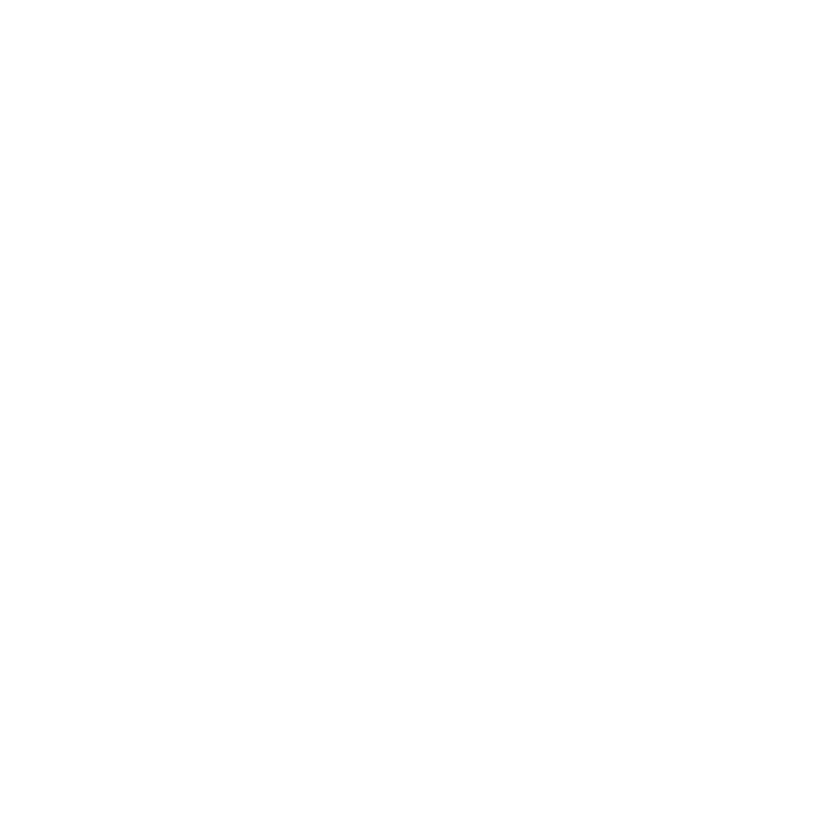

In [33]:
border_christchurch_graph <- plot(border_christchurch, 
                              type = "o",
                             col = "blue",
                             xlab = "Year",
                             ylab = "Number",
                             main = "Christchurch airport yearly border crossings")

In [34]:
border_queenstown <- border_region %>%
    filter(series_name == "Queenstown")
#border_queenstown

border_queenstown <- select(border_queenstown, -series_name)

border_queenstown

parameter,value
<chr>,<int>
2016-01-01,491
2016-01-02,1263
2016-01-03,768
2016-01-04,635
2016-01-05,622
2016-01-06,956
2016-01-07,973
2016-01-08,544
2016-01-09,1067


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"NAs introduced by coercion"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in plot.window(...): need finite 'xlim' values


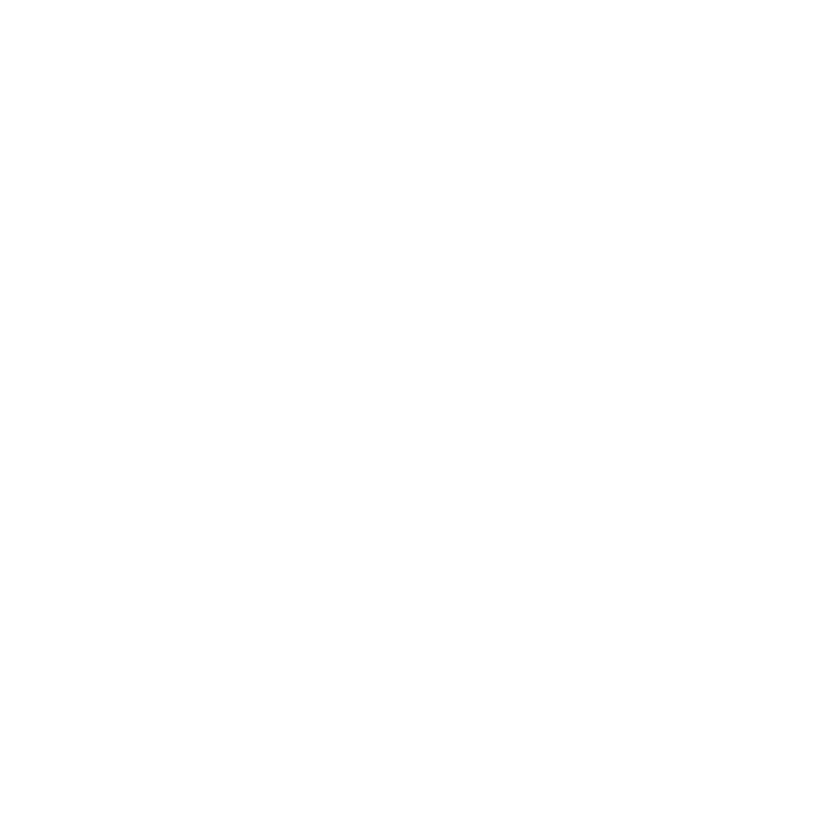

In [35]:
border_queenstown_graph <- plot(border_queenstown, 
                              type = "o",
                             col = "magenta",
                             xlab = "Year",
                             ylab = "Number",
                             main = "Queenstown airport yearly border crossings")

In [36]:
border_wellington <- border_region %>%
    filter(series_name == "Wellington")
#border_wellington

border_wellington <- select(border_wellington, -series_name)

border_wellington

parameter,value
<chr>,<int>
2016-01-01,1439
2016-01-02,1279
2016-01-03,1889
2016-01-04,1424
2016-01-05,1699
2016-01-06,1562
2016-01-07,1614
2016-01-08,1213
2016-01-09,1532


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"NAs introduced by coercion"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in plot.window(...): need finite 'xlim' values


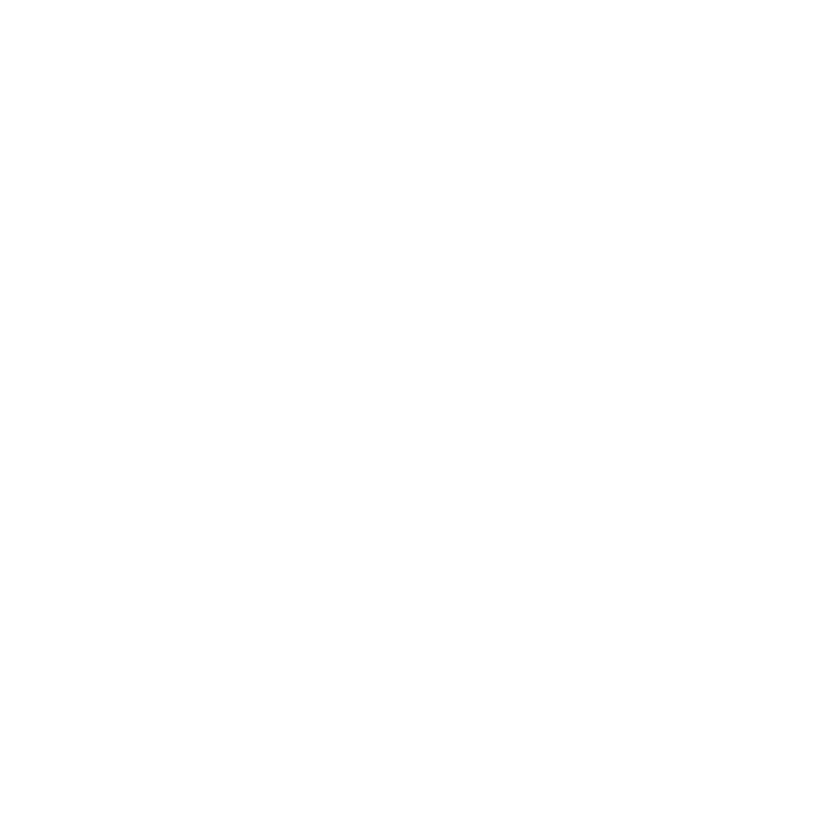

In [37]:
border_wellington_graph <- plot(border_wellington, 
                              type = "o",
                             col = "dark green",
                             xlab = "Year",
                             ylab = "Number",
                             main = "Wellington airport yearly border crossings")

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"NAs introduced by coercion"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in plot.window(...): need finite 'xlim' values


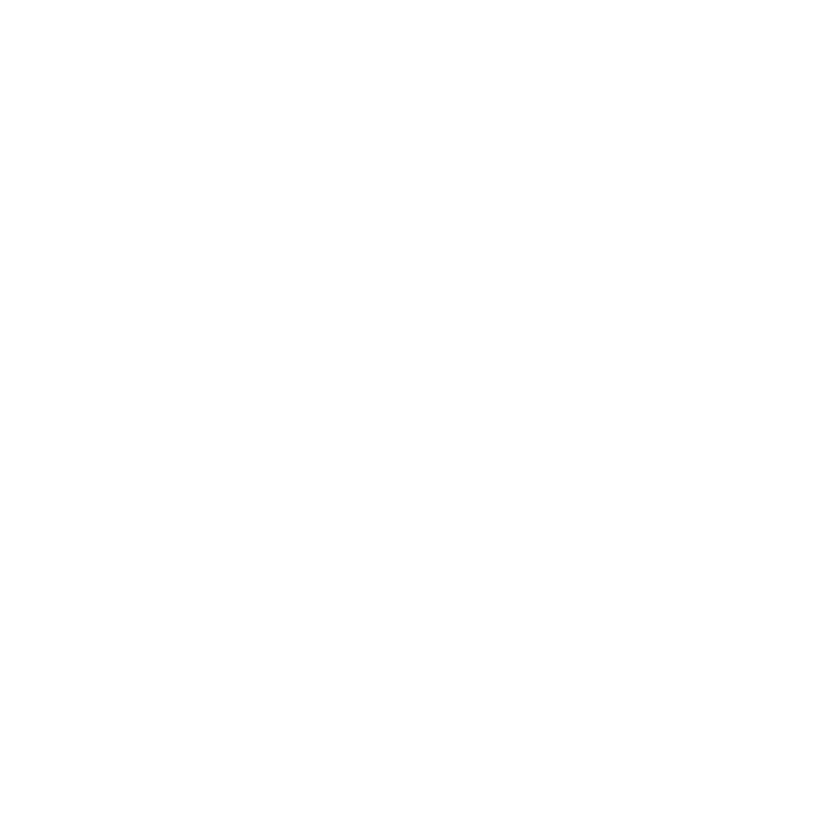

In [38]:
border_auckland_graph <- plot(border_auckland, 
                              type = "o",
                             col = "red",
                             xlab = "Year",
                             ylab = "Number",
                             main = "Airport yearly border cross")

    
lines(border_christchurch, type ="o", col = "blue")
lines(border_queenstown, type ="o", col = "magenta")
lines(border_wellington, type ="o", col = "dark green")
legend(x="topright",
       legend=c("Auckland", "Christchurch", "Queenstown", "Wellingtone"),
       col=c("red", "blue", "magenta", "dark green"), lty=1, cex=0.8,
       title="Cities", text.font=4, bg='lightblue')
    

In [19]:
ggsave(file="auckland_airport_bordercrossing.png", plot = border_auckland_graph)

Saving 6.67 x 6.67 in image

